In [1]:
# 영상처리에 있어서 핵심적인 matplotlib과 opencv , numpy 가져오기
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# 영상처리에 있어서 가장 많이 이용되는 Lena 이미지 활용하기
!wget http://www.lenna.org/len_top.jpg

--2019-02-01 22:46:46--  http://www.lenna.org/len_top.jpg
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32468 (32K) [image/jpeg]
Saving to: ‘len_top.jpg.1’

len_top.jpg.1       100%[===================>]  31.71K  38.0KB/s    in 0.8s    

2019-02-01 22:46:47 (38.0 KB/s) - ‘len_top.jpg.1’ saved [32468/32468]



## Objective

1. 영상에서의 Convolution 연산에 대한 이해
2. padding과 stride에 대한 이해
3. 다양한 filter들

<hr>
<h1 style = "background-color: rgba(185, 109, 106, 0.3);" > 영상에서의 Convolution 연산 처리하기</h1>

> 영상에서 특징을 추출하기 위해서는 단순히 픽셀 각각의 값이 아닌, 인근 픽셀 값과의 관계를 파악해야 합니다. 

> Convolution 연산은 처리하고자 하는 해당 픽셀과 주위 픽셀 정보까지 모두 고려하여 연산하는 방식으로, 영상 내에서 다양한 형태를 효과적으로 추출할 수 있습니다.

<hr>
## 1. Convolution 연산의 기초 



**Convolution 연산이란**
![](../misc/convolution.png)

와 같이, input과 mask의 각 원소를 서로 곱한 후, 전체 합으로 구성되어 있는 연산이다. 우리는 출력영상에서의 $o_{22}$를 구하기 위해서, $I_{11}$~$I_{33}$까지의 입력 영상 정보가 필요하다. Convolution 연산은 구하고자 하는 출력 픽셀의 주위 픽셀 정보를 가지고 위와 같이 연산한다. 

Convolution 연산은 아래와 같이 순차적으로 진행된다.


![](https://cdn-images-1.medium.com/max/1600/1*_34EtrgYk6cQxlJ2br51HQ.gif)

> 보다 이해를 간편하기 위해 파이썬 코드로 구성해 보자.

(225, 400)


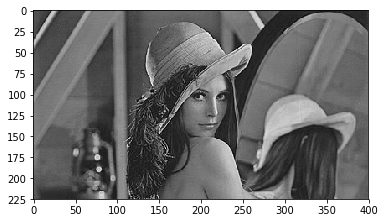

In [3]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
# 흑백영상으로 만듦
plt.imshow(image,cmap='gray')
plt.show()

In [6]:
%%timeit
# convolution 
# 적용할 마스크
mask = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])
height, width = image.shape[:2]

output = np.zeros_like(image) # image의 shape와 동일한 numpy array 생성
for y in range(1,height-1):
    for x in range(1,width-1):
        multiplied = image[y-1:y+2,x-1:x+2] * mask # element-wise multiply
        output[y,x] = np.sum(multiplied) # reduce_mean

550 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


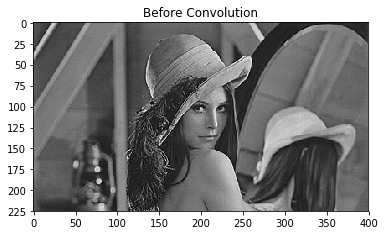

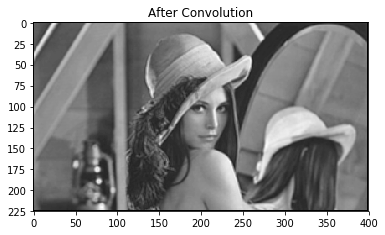

In [5]:
plt.title("Before Convolution")
plt.imshow(image,cmap='gray')
plt.show()

plt.title("After Convolution")
plt.imshow(output,cmap='gray')
plt.show()

> 위의 동작은 아래와 같이 동작합니다.

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = image.shape

fig = plt.figure()
ims = []

for y in range(0,height//10,10):
    for x in range(0,width-20,10):
        _temp = image.copy()
        _temp = cv2.rectangle(_temp,(x,y),(x+20,y+20),255,1)
        im = plt.imshow(_temp,cmap='gray',animated=True)
        ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

HTML(anim.to_jshtml())

> Convolution 연산을 거친 결과, 약간 흐릿하게 변한 것을 확인할 수 있다. opencv에서는 위의 과정을 보다 편하게 구현된 `cv2.filter2D` 메소드가 존재한다. 

In [8]:
%%timeit
output = cv2.filter2D(image, -1, mask)
# plt.imshow(output, cmap='gray')
# plt.show()

158 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### 예제1. 컬러 영상에 Convolution 연산 적용하기
Q. 아래의 마스크 값을 이미지에 convolution 연산을 적용해보세요!

```python
# 적용할 mask의 값
mask = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
```

In [ ]:
# 코드를 입력해보세요


<hr>
## 2. Convolution에서의 padding과 stride

> Convolution에서 꼭 나오는 hyper-parameter에는 padding과 stride가 존재한다. 각각 존재 이유를 알아보자

### 1) padding

> Convolution을 거치게 되면 기본적으로 영상의 크기는 조금 줄어들게 된다. 왜냐하면, 가장자리에서는 Convolution 연산을 적용할 수 없기 때문이다. 

In [ ]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
# 흑백영상으로 만듦
plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
# convolution 
# 적용할 마스크
mask = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])

output = np.zeros_like(image) # image의 shape와 동일한 numpy array 생성
for i in range(1,image.shape[0]-1):
    for j in range(1,image.shape[1]-1):
        multiplied = image[i-1:i+2,j-1:j+2] * mask # element-wise multiply
        output[i,j] = np.sum(multiplied) # reduce_mean

In [ ]:
output # output Matrix 보기

In [ ]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, 0)
print(padded.shape)

# 흑백영상으로 만듦
plt.imshow(padded,cmap='gray')
plt.show()

In [ ]:
# convolution 
# 적용할 마스크
mask = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])

output = np.zeros_like(image) # image의 shape와 동일한 numpy array 생성
for i in range(1,padded.shape[0]-1):
    for j in range(1,padded.shape[1]-1):
        multiplied = padded[i-1:i+2,j-1:j+2] * mask # element-wise multiply
        output[i-1,j-1] = np.sum(multiplied) # reduce_mean
        

In [ ]:
output

> 아까와는 다르게 값이 채워졌다. 즉 출력층의 크기와 입력층의 크기가 보존되었다. 

### 2) stride

> Convolution의 연산을 어떤 간격으로 진행할 것인지를 결정하는 상수로, 이때까지는 1의 stride로 가지고 적용하였다. 1보다 큰 stride를 이용한다면, 출력층의 크기가 훨씬 더 줄어들 것이다.

In [ ]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, 0)


In [ ]:
# convolution 
# 적용할 마스크
mask = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])

stride = 2

output = np.zeros_like(image) # image의 shape와 동일한 numpy array 생성
for i in range(1,padded.shape[0]-1,stride):
    for j in range(1,padded.shape[1]-1, stride):
        multiplied = padded[i-1:i+2,j-1:j+2] * mask # element-wise multiply
        output[i//stride,j//stride] = np.sum(multiplied) # reduce_mean
        

In [ ]:
plt.imshow(output)
plt.show()

> 실제 출력이된 이미지의 크기는 영상에서 1/4밖에 차지하지 못한다. 즉 stride을 키우면 출력 영상의 크기가 반비례하여 줄어든다. 

<hr>
## 3. Convolution에서 사용되는 다양한 필터들

> 컨볼루션 연산에 사용할 수 있는 필터는 다양하다. 각 필터 별로, 영상에서 추출되는 특징들이 다르다. 몇 가지 주요한 필터들을 살펴보자 

##### 1) Gaussian Blur Filter

가우시안 분포를 영상처리에 적용한 것으로,영상 내 노이즈를 제거하기 위한 필터이다.

$$
G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
$$

위의 공식에 따라 5x5 Guassian Mask를 만들면 아래와 같이 나타난다.

![](https://i.stack.imgur.com/Qc4Mq.gif)

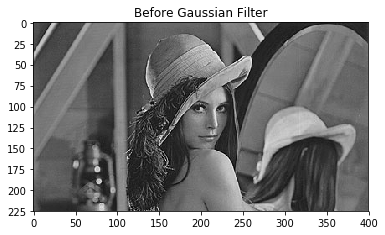

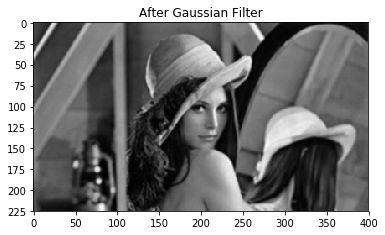

In [9]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gaussian_mask = np.array([
    [1,4,7,4,1],
    [4,16,26,16,4],
    [7,26,41,26,7],
    [4,16,26,16,4],
    [1,4,7,4,1]
])/273


output = cv2.filter2D(image, -1, gaussian_mask)

plt.title("Before Gaussian Filter")
plt.imshow(image,cmap='gray')
plt.show()

plt.title("After Gaussian Filter")
plt.imshow(output,cmap='gray')
plt.show()

> 희미해지면서, 영상 내 세부적인 정보들은 지워지고, 큰 윤곽 중심으로 정보가 남았다. 

#### 2) Prewitt Mask

수직과 수평의 Edge를 찾는데 이용되는 필터이다. Edge에서는 픽셀 간 값의 차이가 크다는 사실을 이용해, 수직과 수평의 차분(difference)을 통해 Edge를 도출한다.

아래가 Prewitt의 수평방향, 수직방향에 대한 마스크이다. 
![](https://www.researchgate.net/profile/S_N_Kumar/publication/317754223/figure/fig3/AS:565335482351616@1511797890242/Masks-for-the-Prewitt-gradient-edge-detector-The-Laplacian-operator-is-based-on-second.png![image.png](attachment:image.png)

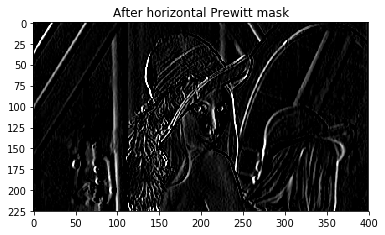

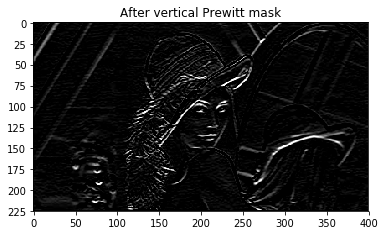

In [10]:
image = cv2.imread("./len_top.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

h_mask = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1],
])
v_mask = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

h_image = cv2.filter2D(image, -1, h_mask)
v_image = cv2.filter2D(image, -1, v_mask)

plt.title("After horizontal Prewitt mask")
plt.imshow(h_image, cmap='gray')
plt.show()

plt.title("After vertical Prewitt mask")
plt.imshow(v_image, cmap='gray')
plt.show()

##### 3) Gabor Filter

영상 내 질감 혹은 외곽선의 패턴을 추출하는 필터로, 사람의 시각체계가 반응하는 것과 비슷하다는 이유로 널리 사용되고 있다.

$$
g(x,y;\lambda,\theta,\psi,\sigma,\gamma ) = exp(\frac{-x^2+\gamma^2y^2}{2\sigma^2})cos(2\pi\frac{x}{\lambda} + \psi)
$$

> Opencv에서는 gabor 필터 값을 만들어주는 메소드를 지원한다.

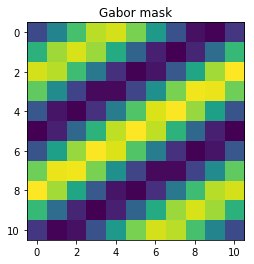

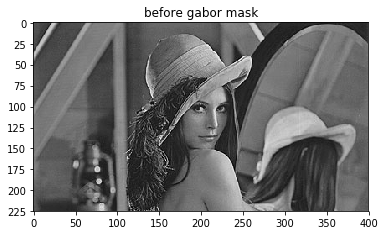

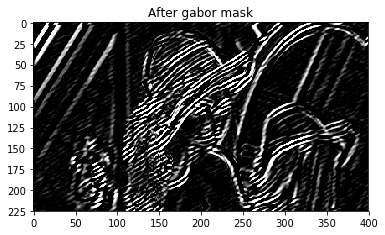

In [11]:
gabor_mask = cv2.getGaborKernel((11,11),10,60*np.pi/180,
                                5,0,0,ktype=cv2.CV_32F)
output = cv2.filter2D(image, -1, gabor_mask)

plt.title("Gabor mask")
plt.imshow(gabor_mask)
plt.show()

plt.title("before gabor mask")
plt.imshow(image, cmap='gray')
plt.show()

plt.title("After gabor mask")
plt.imshow(output, cmap='gray')
plt.show()

> Gabor 필터는 모자, 머리카락 등 질감적인 특징들을 추출한다. 

위와 같이 필터의 값에 따라 추출되는 이미지의 특성들이 다르다. Convolution Filter는 영상 내 특징들을 부각시켜줌으로써, 우리가 원하는 영상 내 특징들을 추출한다.

<hr>

Copyright(c) 2019 by Public AI. All rights reserved. last updated on 2019/02/01<br>
Writen by PAI, SangJae Kang(rocketgrowthsj@publicai.co.kr) 
<hr>